In [28]:
import tensorflow as tf

In [70]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt #Importing the libraries

In [30]:
bank_data = pd.read_csv('Churn_Modelling.csv')

In [31]:
bank_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


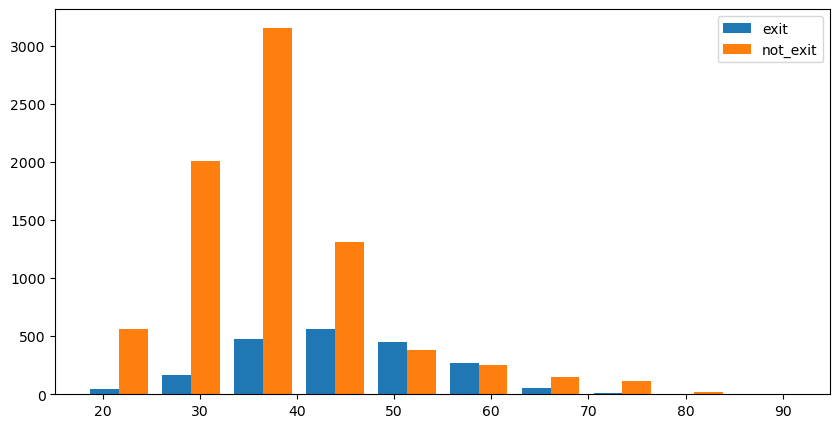

In [71]:
e2 = bank_data[bank_data['Exited']==1]['Age']
n2 = bank_data[bank_data['Exited']==0]['Age']
plt.figure(figsize=(10,5))
plt.hist([e2, n2],label = ['exit', 'not_exit'])
plt.legend()

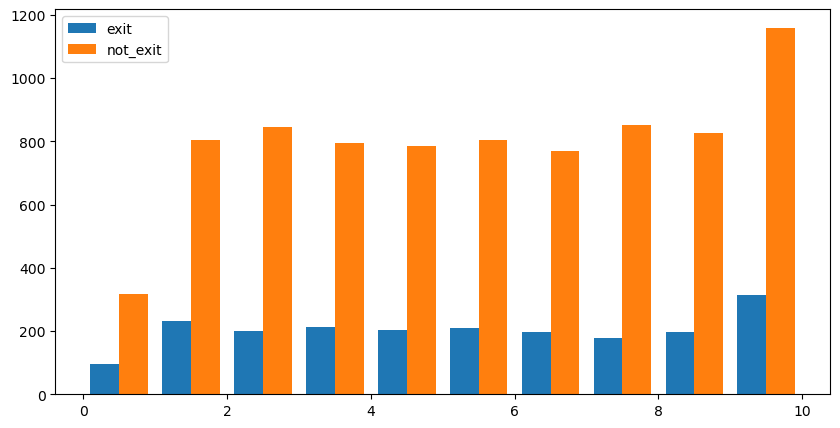

In [72]:
e = bank_data[bank_data['Exited']==1]['Tenure']
n = bank_data[bank_data['Exited']==0]['Tenure']
plt.figure(figsize=(10,5))
plt.hist([e, n],label = ['exit', 'not_exit'])
plt.legend()

In [32]:

# Exclude first 3 columns and the last column, because they are not useful.
# Index starts at 0.
x = bank_data.iloc[:, 3:-1].values

# Just get the last column of dataset for the dependent variable.
y = bank_data.iloc[:, -1].values

In [33]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [34]:
print(y)

[1 0 1 ... 1 1 0]


In [47]:
#Encoding Categorical data
#Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Get all the rwos for the 2 column and encode them.
x[:, 2] = le.fit_transform(x[:, 2])

In [48]:
print(x)

[[1.0 0.0 0 ... 1 1 101348.88]
 [0.0 0.0 1 ... 0 1 112542.58]
 [1.0 0.0 0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0 ... 0 1 42085.58]
 [0.0 1.0 0 ... 1 0 92888.52]
 [1.0 0.0 0 ... 1 0 38190.78]]


In [63]:
#Encoding the "Geography" column
# We do one hot coding for geographical places because they have no relation among themselves like gender did.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [64]:
print (x)

[[1.0 0.0 1.0 ... 1 1 101348.88]
 [1.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 1.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 1.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 1.0 ... 1 0 38190.78]]


In [65]:
bank_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [51]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [52]:
#Feature Scaling
# apply feature scaling to all the features of both the training and the test set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Scaling fitted only to training set to avoid information leakage.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Building the ANN

In [53]:
#Initializing the ANN
# Create a var to represtn the ANN as an instance of the sequential class that initializes our ANN.
ann = tf.keras.models.Sequential()

In [54]:
#Adding the Input layer and the first hidden layer
# add() method belongs to the sequential class.
# add a fully connected layer (hidden), which will be a new object for the dense class.
# Argument for dense() - 
# 'units' - There are called hyperparameters and are the hidden neurons.
# 'activation' - activation function in the hidden layer must be a rectifier activation function.
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) # 'relu' - codename for rectifier activation function.

In [55]:
#Adding the Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) 

In [56]:
#Adding the Output Layer
# As the output layer is binary we only need one neuron to match with the output layer, so 'units' = 1
# We need a sigmoid activation function, because it will give the predictions, as well as the probabilities.
# If we were predicting a categorical variable, activation = 'sigmax'
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 

#Training the ANN

In [57]:
#Compiling the ANN
# Arguments - 
# 'optimizer' - We choose 'adam' optimizer as it can perform stochastic gradient descent. 
#  The stochastic gradient descent will optimize the weights to minimize the loss between the actual and the predicted values.
# 'loss' - When we are doing a binary classification when we are predicting a binary variable use 'binary_crossentropy' and 
#  if we had categorical variable to predict we would have used 'categorical_crossentropy'
# 'metrics' - 
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Training the ANN on the Training set

In [58]:
# Batch learning, default batch size to be compared to the actual results = 32
ann.fit(X_train, y_train, batch_size=32, epochs=100)
# As we can see the accuracy converges around 0.86 around epoch = 20, so we didn't need 100 epochs.

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5896 - accuracy: 0.6923
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7970
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7970
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.7969
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.7995
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8094
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8188
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8325
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8418
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3747 - accura

250/250 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.8590
Epoch 82/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8605
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8604
Epoch 84/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8600
Epoch 85/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8587
Epoch 86/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8597
Epoch 87/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8585
Epoch 88/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8594
Epoch 89/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8596
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 

Making the predictions and evaluating the model

Predicting the result of a single observation

Using this ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000
This doesn't mean that we shouldn't let go of the customers

In [59]:
# As we used a sigmoid function, we get the probability of this person leaving the bank.


In [60]:
Therefore, our ANN model predicts that this customer stays in the bank!
1. The values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

2."France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

SyntaxError: unterminated string literal (detected at line 2) (2302797104.py, line 2)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predicted)
print(cm)
accuracy_score(y_test, y_predicted)

[[1528   57]
 [ 217  198]]


0.863

Therefore, Accuracy = 86%

Total correct predictions that customers stay in bank = 1541

Total correct predictions that customers leave the bank = 185

Total incorrect predictions that customers stay in the bank = 230

Total incorrect predictions that customers leave in the bank = 44
